In [123]:
import pandas as pd
import quandl
import math
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [124]:
quandl.ApiConfig.api_key='2Rk6vqqBy_FW-qzpmoxH'

In [125]:
df=quandl.get('WIKI/GOOGL')

In [126]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [127]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [128]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [129]:
df['high_pct']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Low']*100
df['pct_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100

In [130]:
df=df[['Adj. Close','high_pct','pct_change','Adj. Volume']]

In [131]:
df.head()

,Adj. Close,high_pct,pct_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [132]:
forcast_column='Adj. Close'

In [133]:
forcast_out=int(math.ceil(0.01*len(df)))

In [134]:
df['label']=df[forcast_column].shift(-forcast_out)


In [135]:

df.head()

,Adj. Close,high_pct,pct_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [136]:
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split 


In [137]:
X=np.array(df.drop(['label'],1))

In [138]:
X=preprocessing.scale(X)
X_predict=X[-forcast_out:]
X=X[:-forcast_out]


In [139]:
df.dropna(inplace=True)
y=np.array(df['label'])

In [140]:
len(y)

3389

In [141]:
len(X)

3389

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [143]:
X_test

array([[-6.15960971e-01, -9.06655516e-01, -2.30074439e-01,
        -2.11260615e-01],
       [-7.13084720e-01,  1.43337854e+00, -1.69122160e+00,
         1.47609110e+00],
       [ 2.13832152e+00,  1.94095431e-03,  8.68844541e-01,
        -6.63192858e-01],
       ...,
       [ 1.55536032e+00, -6.13292297e-01,  1.19329174e-01,
        -8.29707829e-01],
       [-6.58655722e-01,  9.72620147e-01, -2.00457319e+00,
        -1.82486537e-01],
       [ 5.23778741e-01,  1.99537880e-01,  8.16259062e-01,
        -4.12570031e-01]])

In [144]:
from sklearn.linear_model import LinearRegression
import pickle

In [145]:
#proced either with linear regression or skip to svm

In [146]:
clf=LinearRegression()

In [147]:
clf.fit(X_train,y_train) #fit -> train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)

In [122]:
#once the pickel is written we can dirrectly open the pickel and skip the training step
#hence we could jump to following step without training the data

In [106]:
pickle_in = open('linearregression.pickle','rb')
clf=pickle.load(pickle_in)

In [149]:
accuracy=clf.score(X_test,y_test)
accuracy

0.9784481582773673

In [108]:
#threading
#clf=LinearRegression(n_jobs=6) #n_jobs give num of threads it reduces training  time 
#clf.fit(X_train,y_train)
#accuracy=clf.score(X_test,y_test)
#accuracy

In [109]:
#threading
#clf=LinearRegression(n_jobs=-1) #-1 gives max num of threads possible 
#clf.fit(X_train,y_train)
#accuracy=clf.score(X_test,y_test)

In [150]:
forcast_set=clf.predict(X_predict)

In [151]:
print(forcast_set,forcast_out,accuracy,end='\n')

[1096.49379364 1073.12058068 1017.74257844 1055.44404884 1073.91979555
 1074.73675725 1091.21912653 1110.12702552 1116.15439954 1122.68761001
 1132.60848737 1130.42028091 1148.59506228 1165.28004169 1136.98119996
 1123.49302241 1087.30619277 1100.62028454 1113.21936153 1122.80069662
 1134.15204611 1150.87288777 1180.43860851 1187.12678521 1157.13811721
 1170.10947501 1170.4185035  1154.26271009 1118.40655085 1115.22507057
 1113.82709703 1070.15336162 1041.97362802 1067.91088334 1017.57407184] 35 0.9784481582773673


In [152]:
df['forcast']=np.nan

In [153]:
df.tail()

,Adj. Close,high_pct,pct_change,Adj. Volume,label,forcast
Date,,,,,,
2018-01-30,1177.37,1.142604,-0.029718,1792602.0,1094.00,NaN
2018-01-31,1182.22,1.213207,-0.134312,1643877.0,1053.15,NaN
2018-02-01,1181.59,1.547000,0.476195,2774967.0,1026.55,NaN
2018-02-02,1119.20,1.811604,-0.729098,5798880.0,1054.09,NaN
2018-02-05,1068.76,5.512236,-2.893850,3742469.0,1006.94,NaN


In [154]:
last_date=df.iloc[-1].name
last_date

Timestamp('2018-02-05 00:00:00')

In [155]:
last_unix=last_date.timestamp()#returns in seconds value of date
one_day=86400
next_unix=last_unix+one_day #next day in seconds

for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

In [156]:
df.tail()

,Adj. Close,high_pct,pct_change,Adj. Volume,label,forcast
Date,,,,,,
2018-03-08 05:30:00,NaN,NaN,NaN,NaN,NaN,1113.827097
2018-03-09 05:30:00,NaN,NaN,NaN,NaN,NaN,1070.153362
2018-03-10 05:30:00,NaN,NaN,NaN,NaN,NaN,1041.973628
2018-03-11 05:30:00,NaN,NaN,NaN,NaN,NaN,1067.910883
2018-03-12 05:30:00,NaN,NaN,NaN,NaN,NaN,1017.574072


In [157]:
df.head()

,Adj. Close,high_pct,pct_change,Adj. Volume,label,forcast
Date,,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849,NaN


In [158]:
#we want to plot closing and predictions on the same graph 
#graph does not considers nan values
#thus the forcast column of given data is declared nan so that it does not interfare with adj. close
#for predicted data forecast is given others are nan thus adj.close woulld not interfare with forcast
#thus helping plotting both without overlapping

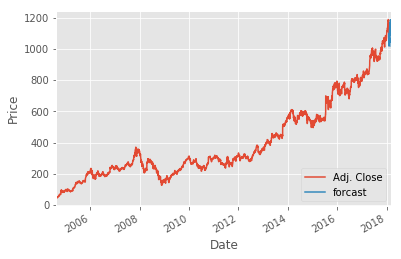

In [159]:
df['Adj. Close'].plot()
df['forcast'].plot()
plt.legend(loc=4) #legend means caption like scale given on map
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [143]:
clf=svm.SVR() #changing algorithm

In [144]:
clf.fit(X_train,y_train) #fit -> train

/home/pmpardeshi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
accuracy=clf.score(X_test,y_test)
accuracy

0.7845170534776367

In [146]:
forcast_set=clf.predict(X_predict)

In [150]:
df['forcast']=np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()#returns in seconds value of date
one_day=86400
next_unix=last_unix+one_day #next day in seconds

for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

In [151]:
df.tail()

,Adj. Close,high_pct,pct_change,Adj. Volume,label,forcast
Date,,,,,,
2018-04-12 11:00:00,NaN,NaN,NaN,NaN,NaN,630.016003
2018-04-13 11:00:00,NaN,NaN,NaN,NaN,NaN,627.435453
2018-04-14 11:00:00,NaN,NaN,NaN,NaN,NaN,623.428044
2018-04-15 11:00:00,NaN,NaN,NaN,NaN,NaN,629.634921
2018-04-16 11:00:00,NaN,NaN,NaN,NaN,NaN,387.242830


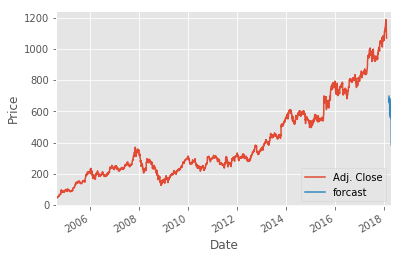

In [152]:
df['Adj. Close'].plot()
df['forcast'].plot()
plt.legend(loc=4) #legend means caption like scale given on map
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [116]:
clf=svm.SVR(kernel='poly') #changing algorithm
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
accuracy

/home/pmpardeshi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.642843995176879